In [6]:
# =========================
# IMPORT LIBRARIES
# =========================
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# =========================
# LOAD DATA (YOUR FILE)
# =========================
df = pd.read_csv("heart_disease_uci.csv")


In [7]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:

# =========================
# TARGET COLUMN
# =========================
# In UCI dataset, target is usually named 'target' or 'num'
# If target > 0 → heart disease present
if "target" in df.columns:
    df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
    target_col = "target"
elif "num" in df.columns:
    df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
    target_col = "num"
else:
    raise ValueError("Target column not found")



In [9]:
# =========================
# IDENTIFY COLUMN TYPES
# =========================
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop(target_col)
categorical_cols = df.select_dtypes(include=["object"]).columns

# =========================
# HANDLE MISSING VALUES
# =========================
# Numeric → median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical → mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# =========================
# FEATURES & LABEL
# =========================
X = df.drop(columns=[target_col])
y = df[target_col]

# =========================
# TRAIN–TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# =========================
# PREPROCESSING PIPELINE
# =========================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ]
)


C:\Users\Anantks\AppData\Local\Temp\ipykernel_18164\3700388562.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


ROC-AUC Score: 0.924


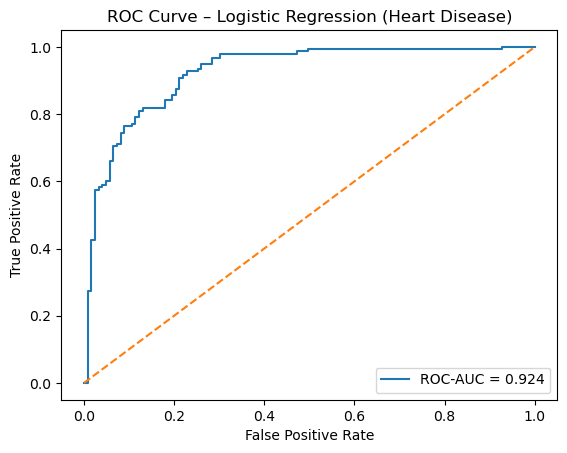

In [10]:

# =========================
# LOGISTIC REGRESSION MODEL
# =========================
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# =========================
# TRAIN MODEL
# =========================
model.fit(X_train, y_train)

# =========================
# ROC–AUC SCORE
# =========================
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC-AUC Score: {roc_auc:.3f}")

# =========================
# ROC CURVE
# =========================
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Heart Disease)")
plt.legend()
plt.show()
